Importing libraries

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from osgeo import ogr

### Land Cover Shapefile (no borders)

Loading the shapefile

In [2]:
land_cover = gpd.read_file('Ilagan_City_shapefile/Ilagan_City.shp')

In [3]:
land_cover

DN            LAND_COVER  \
0     99                Banana   
1   1004               Coconut   
2   5001        Primary Forest   
3   6001      Secondary Forest   
4   5007     Ultramafic Forest   
5   9001              Mangrove   
6     53               Cassava   
7   5555          Mossy Forest   
8   4001             Shrubland   
9     82             Sugarcane   
10  6666  Land with tree cover   
11  7001     Built-up surfaces   
12  8001                 Water   
13   200    Bare soil/sediment   
14  2001             Grassland   
15    12                  Corn   
16    88             Calamansi   
17  5006      Limestone Forest   
18    13                  Rice   

                                             geometry  
0   MULTIPOLYGON (((374940.000 1867830.000, 374950...  
1   MULTIPOLYGON (((398970.000 1866870.000, 398980...  
2   MULTIPOLYGON (((369980.000 1872600.000, 370000...  
3   MULTIPOLYGON (((370550.000 1877280.000, 370560...  
4   MULTIPOLYGON (((437160.000 1867040.000, 437180...  
5   MULTIPOLYGON (((412250.000 1905950.000, 412260...  
6   MULTIPOLYGON (((406630.000 1866880.000, 406640...  
7   MULTIPOLYGON (((420290.000 1870620.000, 420300...  
8   MULTIPOLYGON (((406560.000 1867060.000, 406580...  
9   MULTIPOLYGON (((408810.000 1866840.000, 408840...  
10  MULTIPOLYGON (((434130.000 1868770.000, 434240...  
11  MULTIPOLYGON (((407770.000 1867370.000, 407780...  
12  MULTIPOLYGON (((393160.000 1892000.000, 393190...  
13  MULTIPOLYGON (((377200.000 1867260.000, 377210...  
14  MULTIPOLYGON (((432860.000 1868040.000, 432870...  
15  MULTIPOLYGON (((368870.000 1867230.000, 368900...  
16  MULTIPOLYGON (((416080.000 1867360.000, 416090...  
17  MULTIPOLYGON (((411930.000 1868050.000, 411960...  
18  MULTIPOLYGON (((433130.000 1868530.000, 433160...

Identifying the projection used

In [4]:
land_cover.geometry.crs

<Projected CRS: EPSG:32651>
Name: WGS 84 / UTM zone 51N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°E and 126°E, northern hemisphere between equator and 84°N, onshore and offshore. China. Indonesia. Japan. North Korea. Philippines. Russian Federation. South Korea. Taiwan.
- bounds: (120.0, 0.0, 126.0, 84.0)
Coordinate Operation:
- name: UTM zone 51N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Assigning a color for each land cover type

In [5]:
# https://redketchup.io/color-picker
# match the land cover with the corresponding color in the original image
land_cover['color'] = ['#F5B201', '#C0C0C0', '#589559', '#60DF5C', '#16A086', '#64C864', '#AEA5FE', '#009223', '#B7F8B6', '#9B7E80', '#B7B500', '#FFC3C3', '#0000FE', '#6F6F6F', '#F4F2B4', '#35D0BE', '#E21A1C', '#78A699', '#B3F1F2']

Computing for width to height ratio (to preserve it when plotting)

In [6]:
input_shp = ogr.Open('Ilagan_City_shapefile/Ilagan_City.shp')
source_layer = input_shp.GetLayer()
xmin, xmax, ymin, ymax = source_layer.GetExtent()
width_to_height_ratio = (xmax - xmin) / (ymax - ymin)
width_to_height_ratio

1.2485988067257277

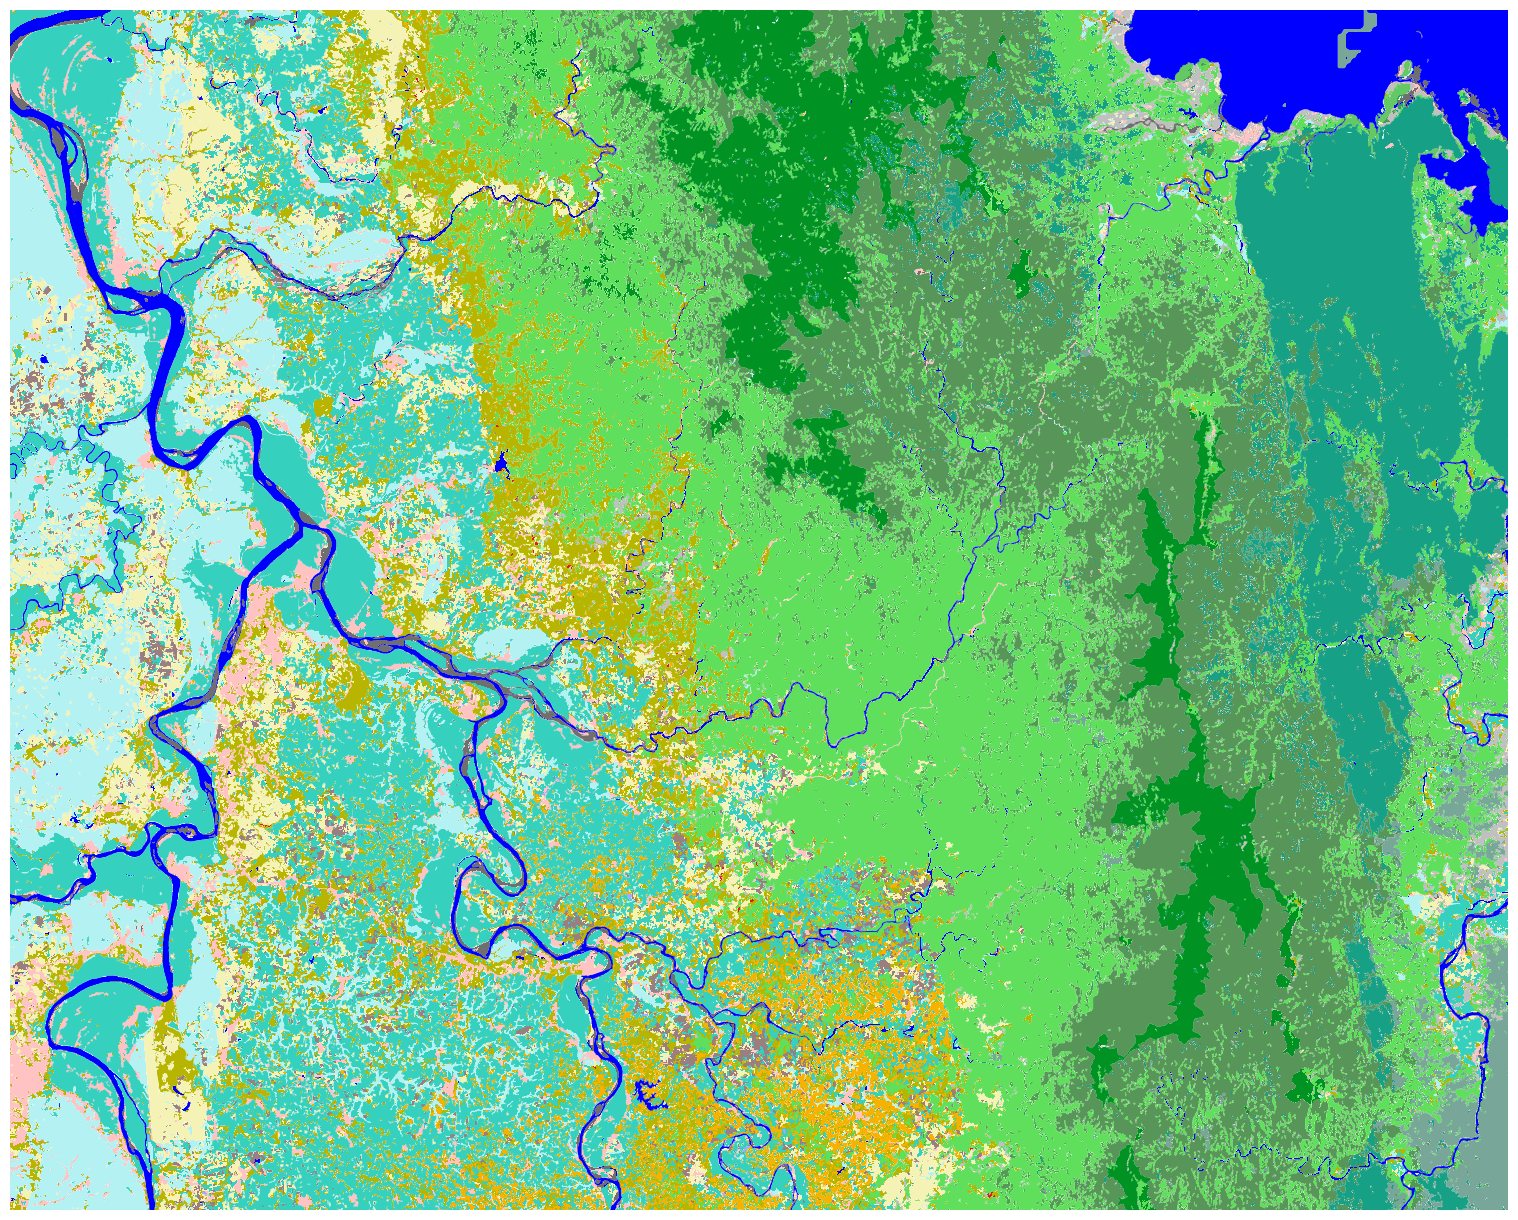

In [7]:
height = 12
fig = plt.figure(figsize = (height * width_to_height_ratio, height))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
land_cover.plot(ax = ax, color = land_cover['color'])
ax.margins(0)
ax.tick_params(left = False, labelleft = False, bottom = False, labelbottom = False)
plt.savefig('map_images/Ilagan_City_land_cover.png', bbox_inches = "tight", pad_inches = 0, dpi = 100)

Categorizing all land cover types into four states and assigning a color for each

In [8]:
def categorize(type):
    if type == 'Primary Forest' or type == 'Secondary Forest' or type == 'Ultramafic Forest' or type == 'Mossy Forest' or type == 'Land with tree cover' or type == 'Limestone Forest':
        return 'Forests and Wooded Land'
    elif type == 'Banana' or type == 'Coconut' or type == 'Cassava' or type == 'Shrubland' or type == 'Sugarcane' or type == 'Bare soil/sediment' or type == 'Grassland' or type == 'Corn' or type == 'Calamansi' or type == 'Rice':
        return 'Open Land'
    elif type == 'Built-up surfaces':
        return 'Built-up Areas'
    elif type == 'Water' or type == 'Mangrove' :
        return 'Water'
    else:
        return None

land_cover['STATE'] = land_cover['LAND_COVER'].apply(categorize)
land_cover

DN            LAND_COVER  \
0     99                Banana   
1   1004               Coconut   
2   5001        Primary Forest   
3   6001      Secondary Forest   
4   5007     Ultramafic Forest   
5   9001              Mangrove   
6     53               Cassava   
7   5555          Mossy Forest   
8   4001             Shrubland   
9     82             Sugarcane   
10  6666  Land with tree cover   
11  7001     Built-up surfaces   
12  8001                 Water   
13   200    Bare soil/sediment   
14  2001             Grassland   
15    12                  Corn   
16    88             Calamansi   
17  5006      Limestone Forest   
18    13                  Rice   

                                             geometry    color  \
0   MULTIPOLYGON (((374940.000 1867830.000, 374950...  #F5B201   
1   MULTIPOLYGON (((398970.000 1866870.000, 398980...  #C0C0C0   
2   MULTIPOLYGON (((369980.000 1872600.000, 370000...  #589559   
3   MULTIPOLYGON (((370550.000 1877280.000, 370560...  #60DF5C   
4   MULTIPOLYGON (((437160.000 1867040.000, 437180...  #16A086   
5   MULTIPOLYGON (((412250.000 1905950.000, 412260...  #64C864   
6   MULTIPOLYGON (((406630.000 1866880.000, 406640...  #AEA5FE   
7   MULTIPOLYGON (((420290.000 1870620.000, 420300...  #009223   
8   MULTIPOLYGON (((406560.000 1867060.000, 406580...  #B7F8B6   
9   MULTIPOLYGON (((408810.000 1866840.000, 408840...  #9B7E80   
10  MULTIPOLYGON (((434130.000 1868770.000, 434240...  #B7B500   
11  MULTIPOLYGON (((407770.000 1867370.000, 407780...  #FFC3C3   
12  MULTIPOLYGON (((393160.000 1892000.000, 393190...  #0000FE   
13  MULTIPOLYGON (((377200.000 1867260.000, 377210...  #6F6F6F   
14  MULTIPOLYGON (((432860.000 1868040.000, 432870...  #F4F2B4   
15  MULTIPOLYGON (((368870.000 1867230.000, 368900...  #35D0BE   
16  MULTIPOLYGON (((416080.000 1867360.000, 416090...  #E21A1C   
17  MULTIPOLYGON (((411930.000 1868050.000, 411960...  #78A699   
18  MULTIPOLYGON (((433130.000 1868530.000, 433160...  #B3F1F2   

                      STATE  
0                 Open Land  
1                 Open Land  
2   Forests and Wooded Land  
3   Forests and Wooded Land  
4   Forests and Wooded Land  
5                     Water  
6                 Open Land  
7   Forests and Wooded Land  
8                 Open Land  
9                 Open Land  
10  Forests and Wooded Land  
11           Built-up Areas  
12                    Water  
13                Open Land  
14                Open Land  
15                Open Land  
16                Open Land  
17  Forests and Wooded Land  
18                Open Land

In [9]:
def color_state(state):
    if state == 'Forests and Wooded Land':
        return '#00FF00' 
    elif state == 'Open Land':
        return '#FFFF00' 
    elif state == 'Built-up Areas':
        return '#FF0000'
    elif state == 'Water':
        return '#0000FF' 
    else:
        return None
    
land_cover['state_color'] = land_cover['STATE'].apply(color_state)
land_cover

DN            LAND_COVER  \
0     99                Banana   
1   1004               Coconut   
2   5001        Primary Forest   
3   6001      Secondary Forest   
4   5007     Ultramafic Forest   
5   9001              Mangrove   
6     53               Cassava   
7   5555          Mossy Forest   
8   4001             Shrubland   
9     82             Sugarcane   
10  6666  Land with tree cover   
11  7001     Built-up surfaces   
12  8001                 Water   
13   200    Bare soil/sediment   
14  2001             Grassland   
15    12                  Corn   
16    88             Calamansi   
17  5006      Limestone Forest   
18    13                  Rice   

                                             geometry    color  \
0   MULTIPOLYGON (((374940.000 1867830.000, 374950...  #F5B201   
1   MULTIPOLYGON (((398970.000 1866870.000, 398980...  #C0C0C0   
2   MULTIPOLYGON (((369980.000 1872600.000, 370000...  #589559   
3   MULTIPOLYGON (((370550.000 1877280.000, 370560...  #60DF5C   
4   MULTIPOLYGON (((437160.000 1867040.000, 437180...  #16A086   
5   MULTIPOLYGON (((412250.000 1905950.000, 412260...  #64C864   
6   MULTIPOLYGON (((406630.000 1866880.000, 406640...  #AEA5FE   
7   MULTIPOLYGON (((420290.000 1870620.000, 420300...  #009223   
8   MULTIPOLYGON (((406560.000 1867060.000, 406580...  #B7F8B6   
9   MULTIPOLYGON (((408810.000 1866840.000, 408840...  #9B7E80   
10  MULTIPOLYGON (((434130.000 1868770.000, 434240...  #B7B500   
11  MULTIPOLYGON (((407770.000 1867370.000, 407780...  #FFC3C3   
12  MULTIPOLYGON (((393160.000 1892000.000, 393190...  #0000FE   
13  MULTIPOLYGON (((377200.000 1867260.000, 377210...  #6F6F6F   
14  MULTIPOLYGON (((432860.000 1868040.000, 432870...  #F4F2B4   
15  MULTIPOLYGON (((368870.000 1867230.000, 368900...  #35D0BE   
16  MULTIPOLYGON (((416080.000 1867360.000, 416090...  #E21A1C   
17  MULTIPOLYGON (((411930.000 1868050.000, 411960...  #78A699   
18  MULTIPOLYGON (((433130.000 1868530.000, 433160...  #B3F1F2   

                      STATE state_color  
0                 Open Land     #FFFF00  
1                 Open Land     #FFFF00  
2   Forests and Wooded Land     #00FF00  
3   Forests and Wooded Land     #00FF00  
4   Forests and Wooded Land     #00FF00  
5                     Water     #0000FF  
6                 Open Land     #FFFF00  
7   Forests and Wooded Land     #00FF00  
8                 Open Land     #FFFF00  
9                 Open Land     #FFFF00  
10  Forests and Wooded Land     #00FF00  
11           Built-up Areas     #FF0000  
12                    Water     #0000FF  
13                Open Land     #FFFF00  
14                Open Land     #FFFF00  
15                Open Land     #FFFF00  
16                Open Land     #FFFF00  
17  Forests and Wooded Land     #00FF00  
18                Open Land     #FFFF00

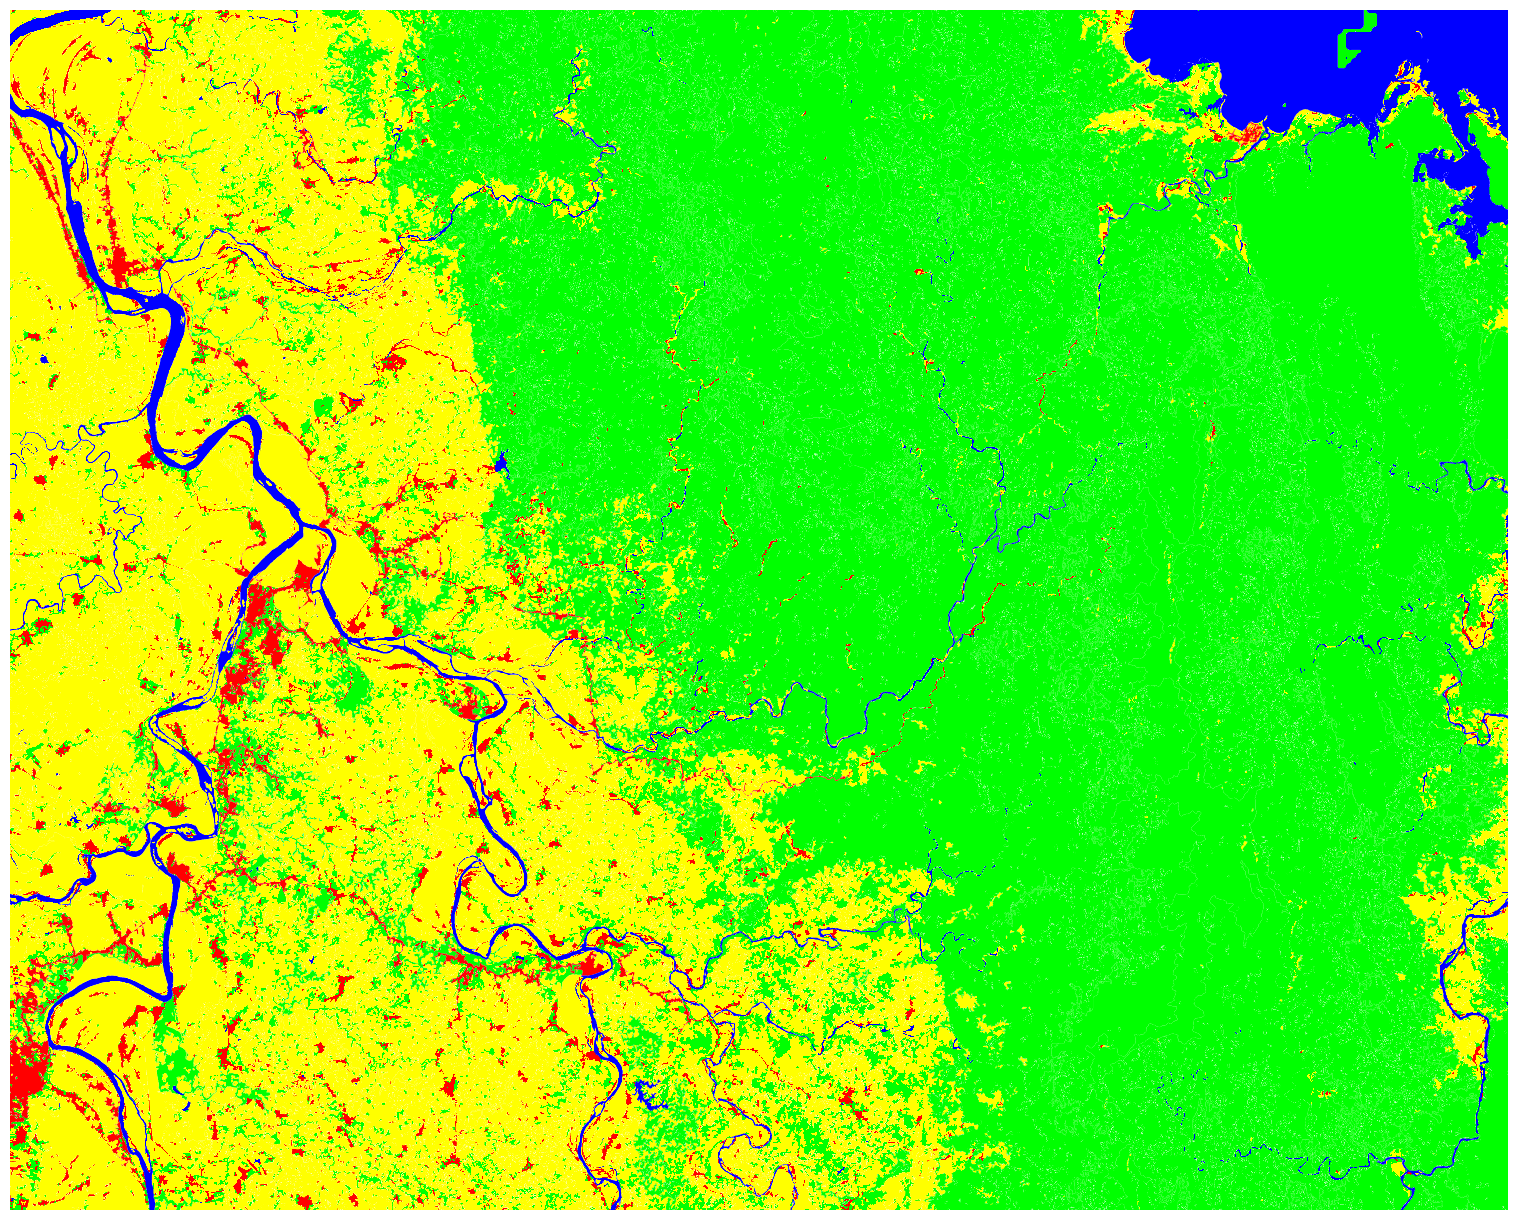

In [10]:
height = 12
fig = plt.figure(figsize = (height * width_to_height_ratio, height))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
land_cover.plot(ax = ax, color = land_cover['state_color'])
ax.margins(0)
ax.tick_params(left = False, labelleft = False, bottom = False, labelbottom = False)
plt.savefig('map_images/Ilagan_City_states.png', bbox_inches = "tight", pad_inches = 0, dpi = 100)

### Philippine Shapefile (with borders for all municipalities)

Loading the shapefile

In [11]:
municipality_data = gpd.read_file('Municipalities/Municipalities.shp')

In [12]:
municipality_data.head()

ADM3_EN   ADM3_PCODE       ADM2_EN   ADM2_PCODE   ADM1_EN  \
0          Adams  PH012801000  Ilocos Norte  PH012800000  Region I   
1        Bacarra  PH012802000  Ilocos Norte  PH012800000  Region I   
2          Badoc  PH012803000  Ilocos Norte  PH012800000  Region I   
3         Bangui  PH012804000  Ilocos Norte  PH012800000  Region I   
4  City of Batac  PH012805000  Ilocos Norte  PH012800000  Region I   

    ADM1_PCODE    ADM_ID     UPDATED  PERIMETER          AREA  LONGITUDE  \
0  PH010000000  12801000  2019-12-31  45988.487  1.111430e+08    120.919   
1  PH010000000  12802000  2019-12-31  33300.976  5.530319e+07    120.613   
2  PH010000000  12803000  2019-12-31  64955.865  8.068397e+07    120.509   
3  PH010000000  12804000  2019-12-31  52052.424  1.150590e+08    120.750   
4  PH010000000  12805000  2019-12-31  66634.568  1.581231e+08    120.584   

   LATITUDE                                           geometry  
0    18.453  POLYGON ((120.94626 18.51158, 120.96915 18.510...  
1    18.267  POLYGON ((120.59081 18.29526, 120.59192 18.295...  
2    17.906  POLYGON ((120.47783 17.97744, 120.47780 17.977...  
3    18.490  POLYGON ((120.79393 18.53475, 120.79537 18.534...  
4    18.038  POLYGON ((120.56070 18.12259, 120.56088 18.122...

Getting the shapefile (with borders) of Ilagan City

In [13]:
ilagan_city = municipality_data[municipality_data['ADM3_EN'] == 'Ilagan City']
ilagan_city

ADM3_EN   ADM3_PCODE  ADM2_EN   ADM2_PCODE    ADM1_EN   ADM1_PCODE  \
172  Ilagan City  PH023114000  Isabela  PH023100000  Region II  PH020000000   

       ADM_ID     UPDATED   PERIMETER         AREA  LONGITUDE  LATITUDE  \
172  23114000  2019-12-31  174906.426  962432899.4    122.029     17.15   

                                              geometry  
172  POLYGON ((122.19250 17.24857, 122.20045 17.228...

Matching projection with projection of land cover map (notice the change in coordinates under the geometry column)

In [14]:
ilagan_city = ilagan_city.to_crs('EPSG:32651')
ilagan_city

ADM3_EN   ADM3_PCODE  ADM2_EN   ADM2_PCODE    ADM1_EN   ADM1_PCODE  \
172  Ilagan City  PH023114000  Isabela  PH023100000  Region II  PH020000000   

       ADM_ID     UPDATED   PERIMETER         AREA  LONGITUDE  LATITUDE  \
172  23114000  2019-12-31  174906.426  962432899.4    122.029     17.15   

                                              geometry  
172  POLYGON ((414159.151 1907232.686, 414994.259 1...

Visualizing Ilagan City with borders

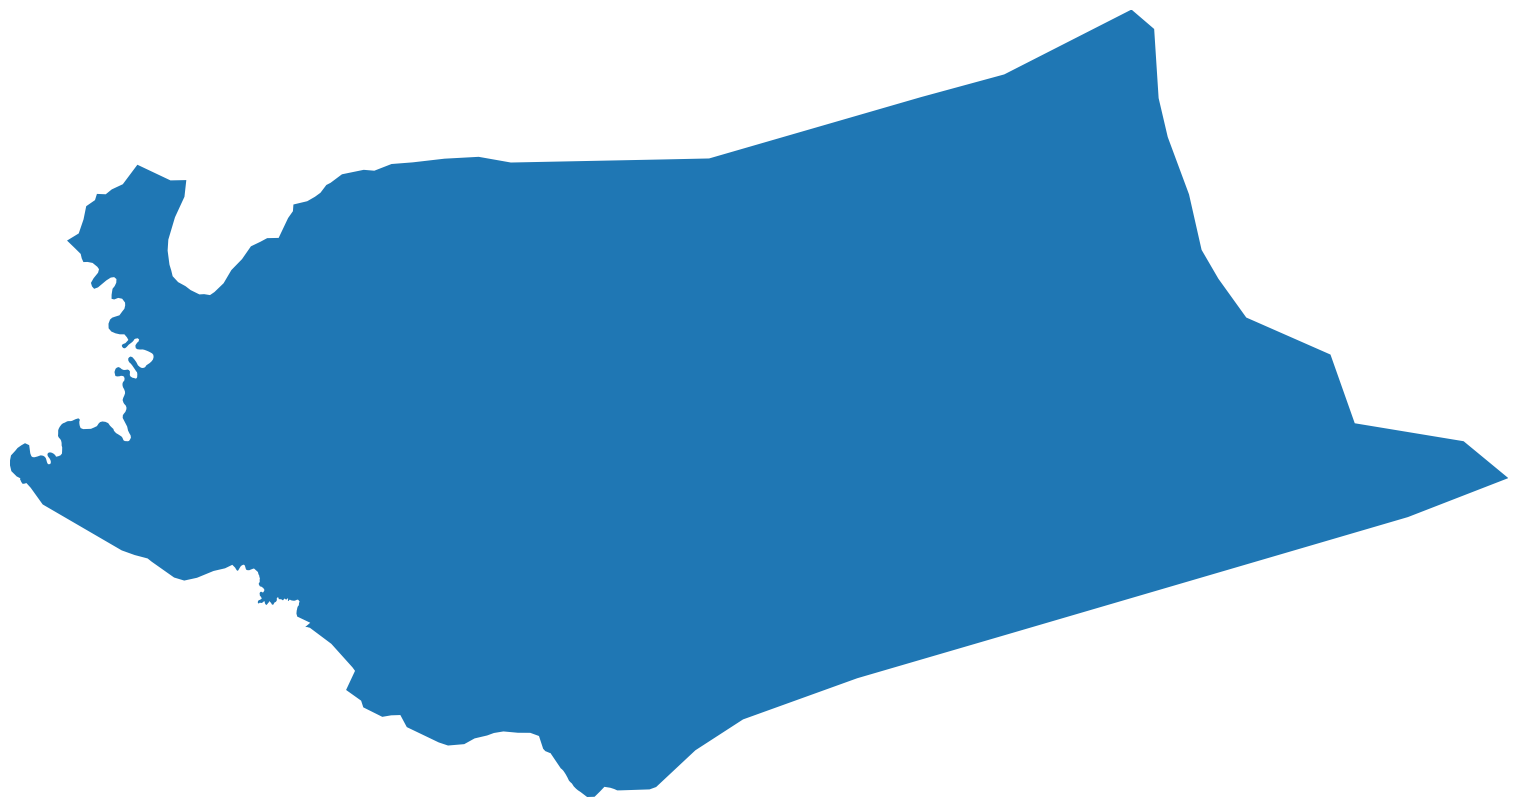

In [15]:
height = 12
fig = plt.figure(figsize = (height * width_to_height_ratio, height))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ilagan_city.plot(ax = ax)
ax.margins(0)
ax.tick_params(left = False, labelleft = False, bottom = False, labelbottom = False)

Getting intersection of land cover map and map with borders

In [16]:
ilagan_city = pd.concat([ilagan_city] * len(land_cover), ignore_index = True)
len(ilagan_city)

19

In [17]:
ilagan_city_land_cover = land_cover.intersection(ilagan_city, False)
ilagan_city_land_cover = gpd.GeoDataFrame(ilagan_city_land_cover)
ilagan_city_land_cover.columns = ['geometry']
ilagan_city_land_cover['LAND_COVER'] = land_cover['LAND_COVER']
ilagan_city_land_cover['color'] = land_cover['color']
ilagan_city_land_cover['STATE'] = land_cover['STATE']
ilagan_city_land_cover['state_color'] = land_cover['state_color']
ilagan_city_land_cover

geometry            LAND_COVER  \
0   MULTIPOLYGON (((394000.000 1882090.000, 394000...                Banana   
1   MULTIPOLYGON (((400480.000 1886130.000, 400480...               Coconut   
2   MULTIPOLYGON (((397980.000 1896210.000, 397980...        Primary Forest   
3   MULTIPOLYGON (((398630.000 1885010.000, 398630...      Secondary Forest   
4   MULTIPOLYGON (((403480.000 1890070.000, 403480...     Ultramafic Forest   
5   POLYGON ((412260.000 1905950.000, 412260.000 1...              Mangrove   
6   MULTIPOLYGON (((390780.000 1882480.000, 390780...               Cassava   
7   MULTIPOLYGON (((405390.000 1900700.000, 405390...          Mossy Forest   
8   MULTIPOLYGON (((402110.000 1886810.000, 402110...             Shrubland   
9   MULTIPOLYGON (((393400.000 1882330.000, 393400...             Sugarcane   
10  MULTIPOLYGON (((393500.000 1883600.000, 393500...  Land with tree cover   
11  MULTIPOLYGON (((393860.000 1887100.000, 393860...     Built-up surfaces   
12  MULTIPOLYGON (((393190.000 1892000.000, 393190...                 Water   
13  MULTIPOLYGON (((390070.000 1882870.000, 390070...    Bare soil/sediment   
14  MULTIPOLYGON (((391330.000 1881590.000, 391330...             Grassland   
15  MULTIPOLYGON (((397810.000 1890070.000, 397810...                  Corn   
16  MULTIPOLYGON (((399410.000 1889550.000, 399410...             Calamansi   
17  MULTIPOLYGON (((419070.000 1892790.000, 419070...      Limestone Forest   
18  MULTIPOLYGON (((394230.000 1882660.000, 394230...                  Rice   

      color                    STATE state_color  
0   #F5B201                Open Land     #FFFF00  
1   #C0C0C0                Open Land     #FFFF00  
2   #589559  Forests and Wooded Land     #00FF00  
3   #60DF5C  Forests and Wooded Land     #00FF00  
4   #16A086  Forests and Wooded Land     #00FF00  
5   #64C864                    Water     #0000FF  
6   #AEA5FE                Open Land     #FFFF00  
7   #009223  Forests and Wooded Land     #00FF00  
8   #B7F8B6                Open Land     #FFFF00  
9   #9B7E80                Open Land     #FFFF00  
10  #B7B500  Forests and Wooded Land     #00FF00  
11  #FFC3C3           Built-up Areas     #FF0000  
12  #0000FE                    Water     #0000FF  
13  #6F6F6F                Open Land     #FFFF00  
14  #F4F2B4                Open Land     #FFFF00  
15  #35D0BE                Open Land     #FFFF00  
16  #E21A1C                Open Land     #FFFF00  
17  #78A699  Forests and Wooded Land     #00FF00  
18  #B3F1F2                Open Land     #FFFF00

Visualizing land cover (with borders)

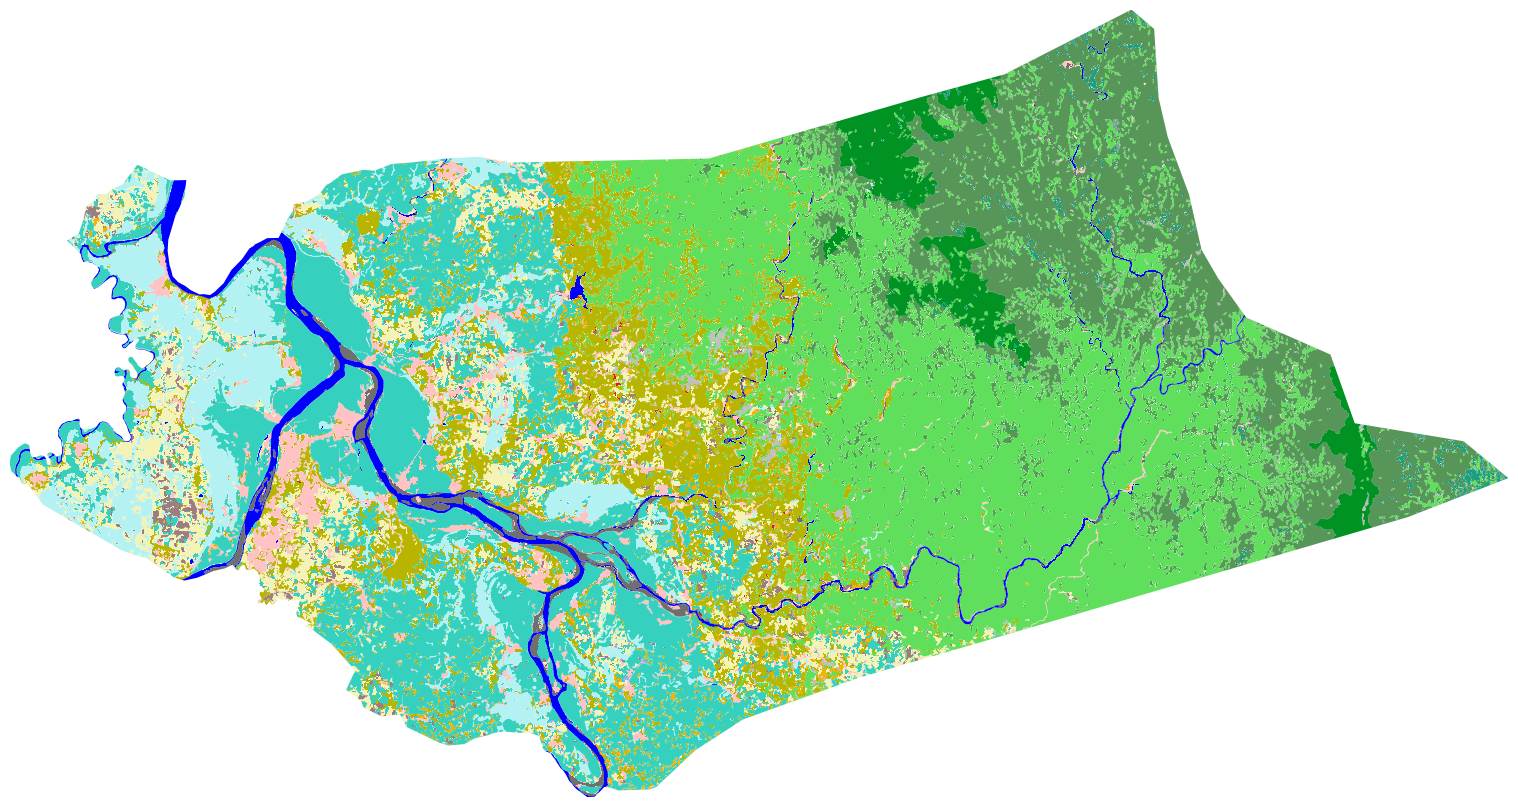

In [18]:
height = 12
fig = plt.figure(figsize = (height * width_to_height_ratio, height))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ilagan_city_land_cover.plot(ax = ax, color = ilagan_city_land_cover['color'])
ax.margins(0)
ax.tick_params(left = False, labelleft = False, bottom = False, labelbottom = False)
plt.savefig('map_images/Ilagan_City_land_cover_with_border.png', bbox_inches = "tight", pad_inches = 0, dpi = 100, transparent = True)

Visualizing states (with border)

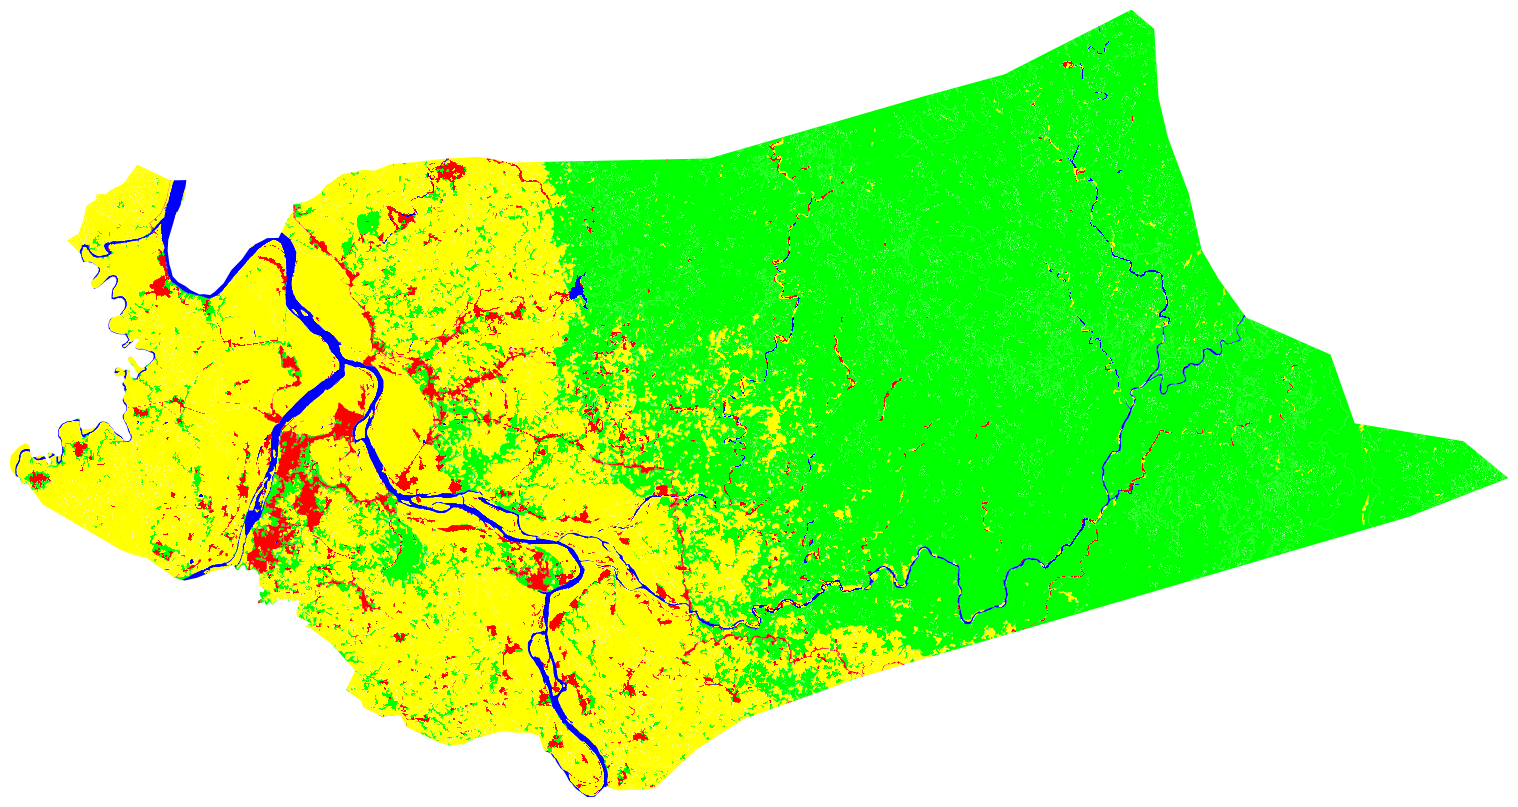

In [19]:
height = 12
fig = plt.figure(figsize = (height * width_to_height_ratio, height))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ilagan_city_land_cover.plot(ax = ax, color = ilagan_city_land_cover['state_color'])
ax.margins(0)
ax.tick_params(left = False, labelleft = False, bottom = False, labelbottom = False)
plt.savefig('map_images/Ilagan_City_states_with_border.png', bbox_inches = "tight", pad_inches = 0, dpi = 100, transparent = True)